In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [3]:
import numpy as np
import pandas as pd
import math
import random
import re
import datetime
import time

import os
import glob
import pickle


import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# Import required for random matrix generation
import scipy.stats as stats
import scipy.sparse as sparse
from docplex.cp.utils_visu import display

from qiskit import *
from qiskit_optimization.applications import Maxcut, Tsp, GraphPartition

# QP specific imports
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.converters import QuadraticProgramToQubo, LinearInequalityToPenalty

# QAOA and circuit cutting specific imports
from qiskit.circuit.library import QAOAAnsatz
#from circuit_knitting_toolbox.circuit_cutting.wire_cutting import cut_circuit_wires
from circuit_knitting.cutting import cut_gates, cut_wires, cutqc

In [4]:
from qiskit import QuantumCircuit, qpy
from qiskit.quantum_info import PauliList
from qiskit_aer.primitives import Estimator, Sampler
from qiskit.circuit import Parameter

from circuit_knitting.cutting import (
    partition_problem,
    generate_cutting_experiments,
    reconstruct_expectation_values,
)

from circuit_knitting.cutting import cut_gates, cut_wires, cutqc, expand_observables
from circuit_knitting.cutting.instructions import CutWire, Move

In [5]:
import string
from collections import OrderedDict
from collections import Counter

from matplotlib import pylab as pl

#clustering
from sklearn.cluster import SpectralClustering
from sklearn import metrics
import markov_clustering as mc
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering

#community detection
import networkx as nx
import networkx.algorithms.community as nx_comm
import community as community_louvain
from collections import defaultdict
from string import ascii_uppercase

In [6]:
# useful additional packages
from qiskit_aer import Aer
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library import TwoLocal
from qiskit_optimization.applications import Maxcut, Tsp
from qiskit.algorithms.minimum_eigensolvers import SamplingVQE, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import SPSA
from qiskit.utils import algorithm_globals
from qiskit.primitives import Sampler
from qiskit_optimization.algorithms import MinimumEigenOptimizer

In [7]:
from mpi4py import MPI
import numpy as np
import time
import itertools

In [8]:
#!brew install mpich

In [9]:
#conda install mpi4py

In [10]:
latin_start = 0x0100  # Start of Latin Extended-A block
latin_end = latin_start + 1000  # 1000 characters from the start

labels = ''.join(chr(i) for i in range(latin_start, latin_end))
labels

'ĀāĂăĄąĆćĈĉĊċČčĎďĐđĒēĔĕĖėĘęĚěĜĝĞğĠġĢģĤĥĦħĨĩĪīĬĭĮįİıĲĳĴĵĶķĸĹĺĻļĽľĿŀŁłŃńŅņŇňŉŊŋŌōŎŏŐőŒœŔŕŖŗŘřŚśŜŝŞşŠšŢţŤťŦŧŨũŪūŬŭŮůŰűŲųŴŵŶŷŸŹźŻżŽžſƀƁƂƃƄƅƆƇƈƉƊƋƌƍƎƏƐƑƒƓƔƕƖƗƘƙƚƛƜƝƞƟƠơƢƣƤƥƦƧƨƩƪƫƬƭƮƯưƱƲƳƴƵƶƷƸƹƺƻƼƽƾƿǀǁǂǃǄǅǆǇǈǉǊǋǌǍǎǏǐǑǒǓǔǕǖǗǘǙǚǛǜǝǞǟǠǡǢǣǤǥǦǧǨǩǪǫǬǭǮǯǰǱǲǳǴǵǶǷǸǹǺǻǼǽǾǿȀȁȂȃȄȅȆȇȈȉȊȋȌȍȎȏȐȑȒȓȔȕȖȗȘșȚțȜȝȞȟȠȡȢȣȤȥȦȧȨȩȪȫȬȭȮȯȰȱȲȳȴȵȶȷȸȹȺȻȼȽȾȿɀɁɂɃɄɅɆɇɈɉɊɋɌɍɎɏɐɑɒɓɔɕɖɗɘəɚɛɜɝɞɟɠɡɢɣɤɥɦɧɨɩɪɫɬɭɮɯɰɱɲɳɴɵɶɷɸɹɺɻɼɽɾɿʀʁʂʃʄʅʆʇʈʉʊʋʌʍʎʏʐʑʒʓʔʕʖʗʘʙʚʛʜʝʞʟʠʡʢʣʤʥʦʧʨʩʪʫʬʭʮʯʰʱʲʳʴʵʶʷʸʹʺʻʼʽʾʿˀˁ˂˃˄˅ˆˇˈˉˊˋˌˍˎˏːˑ˒˓˔˕˖˗˘˙˚˛˜˝˞˟ˠˡˢˣˤ˥˦˧˨˩˪˫ˬ˭ˮ˯˰˱˲˳˴˵˶˷˸˹˺˻˼˽˾˿̴̵̶̷̸̡̢̧̨̛̖̗̘̙̜̝̞̟̠̣̤̥̦̩̪̫̬̭̮̯̰̱̲̳̹̺̻̼͇͈͉͍͎̀́̂̃̄̅̆̇̈̉̊̋̌̍̎̏̐̑̒̓̔̽̾̿̀́͂̓̈́͆͊͋͌̕̚ͅ͏͓͔͕͖͙͚͐͑͒͗͛ͣͤͥͦͧͨͩͪͫͬͭͮͯ͘͜͟͢͝͞͠͡ͰͱͲͳʹ͵Ͷͷ\u0378\u0379ͺͻͼͽ;Ϳ\u0380\u0381\u0382\u0383΄΅Ά·ΈΉΊ\u038bΌ\u038dΎΏΐΑΒΓΔΕΖΗΘΙΚΛΜΝΞΟΠΡ\u03a2ΣΤΥΦΧΨΩΪΫάέήίΰαβγδεζηθικλμνξοπρςστυφχψωϊϋόύώϏϐϑϒϓϔϕϖϗϘϙϚϛϜϝϞϟϠϡϢϣϤϥϦϧϨϩϪϫϬϭϮϯϰϱϲϳϴϵ϶ϷϸϹϺϻϼϽϾϿЀЁЂЃЄЅІЇЈЉЊЋЌЍЎЏАБВГДЕЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯабвгдежзийклмнопрстуфхцчшщъыьэюяѐёђѓєѕіїјљњћќѝўџѠѡѢѣѤѥѦѧѨѩѪѫѬѭѮѯѰѱѲѳѴѵѶѷѸѹѺѻѼѽѾѿҀҁ҂҃҄҅҆҇҈҉ҊҋҌҍҎҏҐґҒғҔҕҖҗҘҙҚқҜҝҞҟҠҡҢңҤҥҦҧҨҩҪҫҬҭҮүҰұҲҳҴҵҶҷҸҹ

In [11]:
'''
Methods required to generate random ER graphs
'''
#Erdos Renyi graph
def generate_er_graph(n, p, random_seed):
    G = nx.erdos_renyi_graph(n,p,seed=random_seed)
    M = nx.adjacency_matrix(G).todense()
    return M, G

'''
Methods required to generate random sparse matrices
'''
def sprandsym(n, density,seed):
    np.random.seed((seed))
    rvs = stats.poisson(25, loc=10).rvs
    X = sparse.random(n, n, density=density, data_rvs=rvs)
    upper_X = sparse.triu(X)
    result = upper_X + upper_X.T - sparse.diags(X.diagonal())
    return result

def binarize_sparse_matrix(sparse_matrix):
    # create a copy of the sparse matrix to keep the operation non-destructive
    sparse_copy = sparse_matrix.copy()
    #sparse_copy=sparse_copy-sparse.diags(sparse_copy.diagonal())
    # find the coordinates of non-zero elements
    non_zero_coords = sparse_copy.nonzero()
    # set those elements to 1
    sparse_copy[non_zero_coords] = 1
    return sparse_copy

def generate_graph_from_matrix(binarized_sparse_mat):
    G = nx.from_scipy_sparse_array(binarized_sparse_mat)
    return G


# create the quadratic program instance and define the variables
def create_qp_from_qmatrix(Q_matrix):
    max_keys = Q_matrix.shape[0]
    qp = QuadraticProgram('QUBO Matrix Optimization')
    x = qp.binary_var_list(name='x', keys=range(1, max_keys + 1))

    linear_vars = {qp.get_variable(i).name: Q_matrix[i, j]
                   for i in range(max_keys) for j in range(max_keys) if i == j}
    quadratic_vars = {(qp.get_variable(i).name, qp.get_variable(j).name): Q_matrix[i, j]
                      for i in range(max_keys) for j in range(max_keys) if i != j}

    qp.minimize(linear=linear_vars, quadratic=quadratic_vars)
    return qp
    #print(self.qp.prettyprint())


def create_qaoa_ansatz(qp):
    #self.create_qp_from_qmatrix()
    h_qubo, offset = qp.to_ising()
    #print(h_qubo)
    qaoa_ansatz = QAOAAnsatz(cost_operator=h_qubo, reps=1, )
    qaoa_ansatz.entanglement = 'linear'
    params = len(qaoa_ansatz.parameters)
    theta_range = np.linspace(0, np.pi, params)
    qaoa_qc = qaoa_ansatz.bind_parameters(theta_range)
    decomposed_qaoa_ansatz = qaoa_qc.decompose().decompose().decompose().decompose()
    return h_qubo, offset, decomposed_qaoa_ansatz


In [12]:
def get_subgraph_properties1(G):
    cnt=0
    subgraphs = (G.subgraph(c) for c in nx.connected_components(G))
    subgraph_prop = {}
    prop = []
    max_size = []
    max_subgraph_nodes = ''
    for s in subgraphs:
        #print(s.nodes())
        n = tuple(s.nodes())
        subgraph_prop[n] = nx.adjacency_matrix(s).todense()
        #print(s.size())
        #print(f'Subgraph {cnt}:: Num of Edges: {s.size()},  Nodes : {s.nodes()}  ')
        cnt+=1
        max_size.append(len(s.nodes()))
        if len(s.nodes)== np.max(max_size):
            max_subgraph_nodes = s.nodes()
        
        
    #print(max_subgraph_nodes)
    return cnt, np.max(max_size), subgraph_prop, max_subgraph_nodes



In [13]:
def bfs(q1, max_cluster_size):
    q1_nd = [q[0] for q in sorted(q1.degree, key=lambda x:x[1], reverse=True)]
            
    q_scidx = {}
    scidx_q = {}
    sc_idx = 0
    visited = []

    #for node in sorted(q1.nodes):
    for node in q1_nd:
        if node not in visited:
            scidx_q.setdefault(sc_idx, [])

            nodes_in_sc = set(list(sum(sorted(list(nx.bfs_tree(q1, source=node, depth_limit=1).edges())),())))
            #print(f'nodes_in_sc: {nodes_in_sc}')

            for k in nodes_in_sc:
                ## required only if using to find cut wire position*****
                q_scidx.setdefault(k,[]) #q_scidx
                q_scidx[k].append(sc_idx) #q_scidx
                ## ********

                #print(f'visited: {visited}')
                if (k not in visited) and (len(scidx_q[sc_idx])<max_cluster_size) :
                    scidx_q[sc_idx].append(k)
                    visited.append(k)
            sc_idx += 1

    qsc = OrderedDict(sorted(scidx_q.items()))
    cluster_qubit ={}
    bfs_cluster_labels = []

    for qsc_k, qsc_val in qsc.items():
        for qsc_i in qsc_val:
            cluster_qubit.setdefault(qsc_i,[])
            cluster_qubit[qsc_i].append(qsc_k)
    bfs_cluster_labels = [i for val in (OrderedDict(sorted(cluster_qubit.items()))).values() for i in val]
    return bfs_cluster_labels

def sc(data, n_clusters):
    sc = SpectralClustering(n_clusters, affinity='precomputed', n_init=100)
    sc.fit(data)
    return sc.labels_

def kmeans(data, n_clusters):
    kmeans = KMeans(init="k-means++", n_clusters=n_clusters, n_init=4, random_state=0)
    kmeans.fit(data)
    return kmeans.labels_
    
def kmeans_pca(data, n_clusters):
    pca = PCA(n_components=n_clusters).fit(data)
    kmeans_pca = KMeans(init=pca.components_, n_clusters=n_clusters, n_init=1)
    kmeans_pca.fit(data)
    return kmeans_pca.labels_

def kmeans_random(data, n_clusters):
    kmeans_rand = KMeans(init="random", n_clusters=n_clusters, n_init=4, random_state=0)
    kmeans_rand.fit(data)
    return kmeans_rand.labels_

def birch(data, n_clusters):
    brc = Birch(n_clusters=n_clusters)
    brc.fit(data)
    birch_labels = brc.predict(data)
    return birch_labels

def agglom(data, n_clusters):
    clustering = AgglomerativeClustering(n_clusters=n_clusters).fit(data)
    return clustering.labels_

def louivan_community(G,max_size):
    import community as community_louvain
    clabels = community_louvain.best_partition(G)

    # Split communities if they are larger than max_cluster_size
    return clabels #split_large_communities(clabels, max_size)

def girvan_newman_community(G, max_size):
    communities_generator = nx.community.girvan_newman(G)
    top_level_communities = next(communities_generator)
    partition = {node: i for i, community in enumerate(top_level_communities) for node in community}
    return partition #split_large_communities(clabels, max_size)

def label_propagation_community(G, max_size):
    partition = nx.community.label_propagation_communities(G)
    partition_dict = {node: i for i, community in enumerate(partition) for node in community}
    return partition_dict #split_large_communities(partition_dict, max_size)

def leading_eigenvector_community(G, max_size):
    partition = nx.community.leading_eigenvector(G)
    partition_dict = {node: i for i, community in enumerate(partition) for node in community}
    return partition_dict #split_large_communities(partition_dict, max_size)

def walktrap_community(G, max_size):
    import igraph as ig
    g = ig.Graph.from_networkx(G)
    walktrap = g.community_walktrap()
    communities = walktrap.as_clustering()
    partition_dict = {node: i for i, community in enumerate(communities) for node in community}
    return partition_dict #split_large_communities(partition_dict, max_size)

def infomap_community(G, max_size):
    from infomap import Infomap
    im = Infomap()
    for e in G.edges():
        im.add_link(*e)
    im.run()

    # Correctly accessing the nodes and their community assignment
    partition = {}
    for node in im.tree:
        if node.is_leaf:
            partition[node.node_id] = node.module_id

    return partition #split_large_communities(clabels, max_size)


def clique_percolation_community(G,  max_size,k=2):
    partition = list(nx.community.k_clique_communities(G, k))
    partition_dict = {node: i for i, community in enumerate(partition) for node in community}
    return partition_dict #split_large_communities(partition_dict, max_size)


def split_large_communities(partition, max_size):
    new_partition = {}
    new_community_id = max(partition.values()) + 1  # Start from the next available community ID

    for community in set(partition.values()):
        nodes_in_community = [node for node, comm in partition.items() if comm == community]
        
        if len(nodes_in_community) > max_size:
            # Split the community into smaller ones
            for i in range(0, len(nodes_in_community), max_size):
                for node in nodes_in_community[i:i + max_size]:
                    new_partition[node] = new_community_id
                new_community_id += 1
        else:
            # If the community is within the size limit, keep it unchanged
            for node in nodes_in_community:
                new_partition[node] = community

    return new_partition




def ckt(qaoa_decomposed, part_lbl, observables):
    
    ordered_part_lbl = OrderedDict(sorted(part_lbl.items()))
    partition_labels = ''.join(ordered_part_lbl.values())
    print(f'\nPartition labels for CKT: {partition_labels}')
    start_time = time.time()
    
    partitioned_problem = partition_problem(circuit=qaoa_decomposed, 
                                            partition_labels=partition_labels, 
                                            observables=observables)
    ckt_runtime = time.time()-start_time
    bases = partitioned_problem.bases
    sampling_overhead = np.prod([basis.overhead for basis in bases])
    print(f"Sampling overhead: {sampling_overhead}")
    return partition_labels, sampling_overhead, ckt_runtime


In [10]:
partition_algos = {
                #'bfs' : bfs(q1, max_cluster_size),
                'spectral-clustering' : sc(data, n_clusters, key, max_cluster_size),
                'kmeans' : kmeans(data, n_clusters),
                #'kmeans-pca' : kmeans_pca(data, n_clusters),
                #'kmeans-random' : kmeans_random(data, n_clusters),
                #'birch' : birch(data, n_clusters),
                #'agglom' : agglom(data, n_clusters),
                #'louivan' : louivan_community(q1,max_cluster_size),
                #'girvan-newman' : girvan_newman_community(q1,max_cluster_size),
                #'label-propagation' : label_propagation_community(q1,max_cluster_size),
                #'leading-eigenvecto' : leading_eigenvector_community(q1,max_cluster_size),
                #'walktrap' : walktrap_community(q1,max_cluster_size),
                #'infomap' : infomap_community(q1,max_cluster_size),
                #'clique-percolation' : clique_percolation_community(q1,max_cluster_size)
            }

NameError: name 'data' is not defined

In [14]:



def sc2(*argv):
    data = argv[0][0]
    n_clusters = argv[0][1]
    sc = SpectralClustering(n_clusters, affinity='precomputed', n_init=100)
    sc.fit(data)
    #TODO: verify sub cluster size<max_cluster_size. Is this still required??
    return sc.labels_

def kmeans2(*argv):
    print('In kmeans')
    data = argv[0][0]
    n_clusters = argv[0][1]

    kmeans = KMeans(init="k-means++", n_clusters=n_clusters, n_init=4, random_state=0)
    kmeans.fit(data)
    return kmeans.labels_
 
def louivan_community2(*argv):
    G = argv[0][0]
    print(G)
    max_size = argv[0][1]
    print(max_size)
    import community as community_louvain
    clabels = community_louvain.best_partition(G)

    

def partitioning(max_cluster_size, qsubgraph_prop, partition_method):
    
    #cm_part_lbl = {}
    #partitioning_time = {}
    start_time = time.time()
    part_lbl = {}
    max_key_cnt = -1
    for i, key in enumerate(qsubgraph_prop.keys()):  
        #print(f'Subgraph nodes : {key}')
        if len(key)>max_cluster_size:
            data = qsubgraph_prop[key]
            n_clusters = int(np.ceil(len(key)/max_cluster_size))
            q1=nx.from_numpy_array(data)
            #print('before function call')
            algos = {
                'spectral-clustering' : 
                    {
                        'func':sc2, 
                        'params':(data, n_clusters)
                    },
                'kmeans' : 
                    {
                        'func':kmeans2, 
                        'params':(data, n_clusters)
                    },
                'kmeans-pca' : 
                    {
                        'func':kmeans_pca, 
                        'params':(data, n_clusters)
                    },
                'kmeans-random' : 
                    {
                        'func':kmeans_random,
                        'params':(data, n_clusters)
                    },
                'birch' : 
                    {
                        'func':birch,
                        'params':(data, n_clusters)
                    },
                'agglom' : 
                    {
                        'func':agglom,
                        'params':(data, n_clusters)
                    },
                'louivan' : 
                    {
                        'func':louivan_community2,
                        'params':(q1,max_cluster_size)},
                'girvan-newman' : 
                    {
                        'func':girvan_newman_community,
                        'params':(q1,max_cluster_size)
                    },
                'label-propagation' : 
                    {
                        'func':label_propagation_community,
                        'params':(q1,max_cluster_size)},
                'leading-eigenvector' : 
                    {
                        'func':leading_eigenvector_community,
                        'params':(q1,max_cluster_size)},
                'walktrap' :  
                    {
                        'func':walktrap_community,
                        'params':(q1,max_cluster_size)},
                'infomap' :  
                    {
                        'func':infomap_community,
                        'params':(q1,max_cluster_size)},
                'clique-percolation' : 
                    {
                        'func':clique_percolation_community,
                        'params':(q1,max_cluster_size)
                    }
                }
            
                
            #pm = ops[partition_method](func_arg[partition_method])
            func = algos[partition_method]['func']
            params = algos[partition_method]['params']
           
            #call the partition method
            clabels = func(params)

            #increment the sclbl with max_key_cnt so that the next sub-graphs labels are not repeated
            cluster_lbls = [lbl + max_key_cnt + 1 for lbl in clabels]
            for j, k_ in enumerate(key):
                if cluster_lbls[j] < len(labels):
                    part_lbl[k_] = labels[cluster_lbls[j]]
                else:
                    print(f'Error: Index out of range. cluster_lbls[j]: {cluster_lbls[j]}, Length of labels: {len(labels)}')

            max_key_cnt = np.max(cluster_lbls)

        else:
            # Handle smaller subgraphs
            max_key_cnt += 1
            for k in key:
                if max_key_cnt < len(labels):
                    part_lbl[k] = labels[max_key_cnt]
                else:
                    print(f'Error: Index out of range. max_key_cnt: {max_key_cnt}, Length of labels: {len(labels)}')
        #print('done part')
        #cm_part_lbl[cm] = (part_lbl, partitioning_runtime)
        #print(f'Partition labels for method {cm}: {part_lbl}')
    partitioning_time = time.time() - start_time  

    return part_lbl, partitioning_time

In [15]:
import os


In [16]:
import pickle

qaoa_graph_obj_dir = 'qaoa_graph_objects/'
qaoa_output = 'qaoa_output/'
ckt_output = 'ckt_output/'

def ckt_build_qaoa(mat_size, n_times_p, random_seeds, matrix_type):
    '''
    ## Create sparse matrix for a given size and density
    ## Convert the sparse matrix into QUBO, map Ising hamiltonian
    ## Generate QAOA ansatz for QUBO and assign its observables
    '''
    
    cols = ['n', 'p', 'seed','Graph File','qaoa Ansatz File', 
            'Ising Hamiltonian Runtime', 'Ansatz Building Runtime','qubitOp']

    df = pd.DataFrame(columns=cols)
    #df['Graph Prop'] = df['Graph Prop'].astype('object')
    #df['qubitOp'] = df['qubitOp'].astype('object')
   
    i = 0
    for n in mat_size:
        for p in (n_times_p): 
            for seed in random_seeds:
                #multi-thread code to go here for a set of seeds??
                try:
                    print(f'\n\nQAOA for size {n}, n*p {p}, seed {seed}')
                    if i==0:
                        seed1 = seed 
                    i+=1
                    ## Create sparse matrix for a given size and density
                    #record the matrix creation time
                    start_time = time.time()
                    if 'random_sparse' in matrix_type:
                        M = sprandsym(n,p,seed)
                        M = binarize_sparse_matrix(M)
                        q=generate_graph_from_matrix(M)

                    ## Get adjacency matrix for a random Erdos Renyi Graph
                    elif 'er_graph' in matrix_type:
                        M,q = generate_er_graph(n,p,seed)
                    matrix_creation_time = time.time() - start_time
                    
                    # save graph object to file
                    graph_filename=os.path.join(qaoa_graph_obj_dir,f'{n}_{p}_{seed}_graph.pickle')
                    pickle.dump(q, open(graph_filename, 'wb'))

                    #Get subgraphs' properties
                    #qnum_sub_graphs, largest_subgraph_size, qsubgraph_prop, max_subgraph_nodes = get_subgraph_properties1(q)
                
                    
                    ## Convert the sparse matrix into QUBO
                    # Timing for QUBO conversion
                    start_time = time.time()
                    qp = create_qp_from_qmatrix(M)
                    qp2qubo = QuadraticProgramToQubo()
                    qubo = qp2qubo.convert(qp)
                    qubitOp, offset = qubo.to_ising()
                    qubo_conversion_time = time.time() - start_time
                    #print(qubitOp)

                    ## Generate and save QAOA ansatz for QUBO
                    # Timing for QAOA
                    start_time = time.time()
                    qaoa = QAOAAnsatz(cost_operator=qubitOp, reps=1)
                    qaoa_observable_pat = '[A-Z]+'
                    observables = PauliList(re.findall(qaoa_observable_pat, str(qubitOp)))
                    qaoa_time = time.time() - start_time
                    
                    qa = qaoa.decompose().decompose().decompose().decompose()
                    #display(qa.draw(scale=0.4))
                    
                    #pickle the qaoa ansatz
                    qc_file = os.path.join(qaoa_graph_obj_dir,f'{n}_{p}_{seed}_qaoa.qpy')
                    with open(file=qc_file, mode='wb') as qcfile:
                        qpy.dump(qaoa, qcfile)
                        
                    #Populate the df
                    df.loc[i,'n'] = n
                    df.loc[i,'p'] = p
                    df.loc[i,'seed'] = seed
                    df.loc[i,'Graph File'] = graph_filename
                    df.loc[i,'qaoa Ansatz File'] = qc_file
                    df.loc[i,'qubitOp'] = str(qubitOp)
                    df.loc[i,'Ising Hamiltonian Runtime'] = qubo_conversion_time
                    df.loc[i,'Ansatz Building Runtime'] = qaoa_time
                    
                except Exception as e:
                    print(f"An error occurred: {e}")
                    # Optionally, save the DataFrame
                    current_time = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
                    filename = f'exp_data_up_to_failure_{current_time}.csv'
                    df.to_csv(os.path.join(qaoa_output,filename), index=False)
                    #re-raise the exception if you want to stop the loop
                    raise e
    current_time = datetime.datetime.now().strftime("%Y%m%d_%H%M")
                    
    filename = f'exp_' + str(n) + '_' + str(p) + '_' + str(seed1)+ '_' + str(seed) + '_qaoa_' +current_time+'.csv'
    df.to_csv(os.path.join(qaoa_output,filename), index=False)
    return df




In [17]:
def ckt_cut_qaoa(exp_data_file, max_qubit_counts, partition_methods, start_seed=None, end_seed=None):
    cols = ['n', 'p', 'seed','Max Qubit Count',
           'Partition Method', 'Partition Runtime', 'CKT Runtime'] #'qaoa Ansatz File'
    failed_cols = ['n', 'p', 'seed','Max Qubit Count', 'Partition Method']
    
    df = pd.DataFrame(columns=cols)
    df_failed = pd.DataFrame(columns=failed_cols)
    i = 0
    for max_qubit_cnt in max_qubit_counts:
        for file in exp_data_file:
            try:
                input_df = pd.read_csv(file)
                if start_seed is None:
                    start_seed = 0
                if end_seed is None:
                    end_seed = 1000000
                input_df = input_df[(input_df['seed']>=start_seed)&(input_df['seed']<=end_seed)]
                print(input_df['seed'].values)

                for i, row in enumerate(input_df.itertuples(index=False), 1):
                    n = row[0]
                    p = row[1]
                    seed = row[2]
                    if i==1:
                        seed1 = seed 
                    #seedn = seed if i==input_df.shape[0]
                    graph_filename = row[3]

                    #import ast
                    #qsubgraph_prop = eval(qsub_prop)

                    # load graph object from file
                    q = pickle.load(open(graph_filename, 'rb'))
                    qnum_sub_graphs, largest_subgraph_size, qsubgraph_prop, max_subgraph_nodes = get_subgraph_properties1(q)

                    qc_file = row[4]
                    qubitOp = row[7]
                    #read the file with qaoa ansatz object
                    st = time.time()
                    with open(qc_file, mode='rb') as qc:
                        reloaded_qaoa_ansatz = qpy.load(qc)[0]
                    #qaoa_decomposed = reloaded_qaoa_ansatz.decompose().decompose().decompose().decompose()
                    qaoa_decomposed = reloaded_qaoa_ansatz.decompose().decompose().decompose().decompose()
                    #display(qaoa_decomposed.draw(scale=0.4))
                    reload_time = time.time() - st
                    print(f'qaoa ansatz reload time: {reload_time}')
                    qaoa_observable_pat = '[A-Z]+'
                    observables = PauliList(re.findall(qaoa_observable_pat, str(qubitOp)))
                    #print(qubitOp)
                    print(f'\n\nCKT Cutting for size {n}, n*p {p}, seed {seed}')
                    #Get subgraphs' properties
                    for pm_ in partition_methods:
                            try:
                                print(pm_)
                                i += 1
                                pm_part_lbl, partitioning_runtime = partitioning(max_qubit_cnt, 
                                                                   qsubgraph_prop, 
                                                                   pm_)
                                print(pm_part_lbl)

                                sc_partlabel,sampling_overhead,ckt_runtime = ckt(qaoa_decomposed, 
                                                                                  pm_part_lbl, 
                                                                                  observables)
                                df.loc[i,'n'] = n
                                df.loc[i,'p'] = p
                                df.loc[i,'seed'] = seed
                                df.loc[i,'Max Qubit Count'] = max_qubit_cnt
                                df.loc[i,'Partition Method'] = pm_
                                df.loc[i,'Partition Runtime'] = partitioning_runtime
                                df.loc[i,'CKT Runtime'] = ckt_runtime
                                df.loc[i,'Sampling Overhead'] = sampling_overhead
                            except Exception as e:
                                print(f"An error occurred: {e}")
                                # Optionally, save the DataFrame
                                current_time = datetime.datetime.now().strftime("%Y%m%d_%H%M")
                                filename = f'exp_' + str(n) + '_' + str(p) + '_' + str(seed1) + str(seed) +'_cktCut_upToFailure_' +current_time+'.csv'
                                #filename = f'exp_cktCutQaoa_up_to_failure_{current_time}.csv'
                                df.to_csv(os.path.join(ckt_output,filename), index=False)
                                
                                #save the failed metadata
                                df_failed.loc[i,'n'] = n
                                df_failed.loc[i,'p'] = p
                                df_failed.loc[i,'seed'] = seed
                                df_failed.loc[i,'Max Qubit Count'] = max_qubit_cnt
                                df_failed.loc[i,'Partition Method'] = pm_
                                continue


                    current_time = datetime.datetime.now().strftime("%Y%m%d_%H%M")
                    filename = f'exp_' + str(n) + '_' + str(p) + '_' + str(seed1) + '_' + str(seed) +'_cktCut_' +current_time+'.csv'
                    df.to_csv(os.path.join(ckt_output,filename), index=False)
                    
                failed_filename = f'FailedExp_' + str(n) + '_' + str(p) + '_' + str(seed1) + '_' + str(seed) +'_cktCut_' +current_time+'.csv'
                df_failed.to_csv(os.path.join(ckt_output,failed_filename), index=False)
            except Exception as e:
                print(f"An error occurred: {e}")
                current_time = datetime.datetime.now().strftime("%Y%m%d_%H%M")
                filename = f'exp_' + str(n) + '_' + str(p) + '_' + str(seed1) + str(seed) +'_cktCut_upToFailure_' +current_time+'.csv'
                df.to_csv(os.path.join(ckt_output,filename), index=False)

       

### No threading

In [249]:
matrix_sizes =  [10]

matrix_densities = [0.2]
num_of_experiments = 5

#sorting the random seeds so that we can pick a range of seeds to execute ckt_cut_qaoa() on
random_seeds = sorted([random.randint(10, 10000) for _ in range(num_of_experiments)])
max_cluster_sizes =[3] 

st = time.time()
df = ckt_build_qaoa(matrix_sizes, matrix_densities, random_seeds, 'er_graph')
print(time.time()-st)



QAOA for size 10, n*p 0.2, seed 2252


QAOA for size 10, n*p 0.2, seed 3010


QAOA for size 10, n*p 0.2, seed 7554


QAOA for size 10, n*p 0.2, seed 9319


QAOA for size 10, n*p 0.2, seed 9940
1.0387179851531982


### multi-threading

In [252]:
random_seeds

[2252, 3010, 7554, 9319, 9940]

In [257]:
from threading import Thread, current_thread

rs = [random_seeds[x:x+3] for x in range(0, len(random_seeds),3)]
print(rs)

st = time.time()
threads = [None]*len(rs)
results = [None]*len(rs)

for i in range(len(threads)):
    threads[i] = Thread(target=ckt_build_qaoa, args =(matrix_sizes, matrix_densities, rs[i], 'er_graph'))
    threads[i].start()
    
for i in range(len(threads)):
    threads[i].join()
print(time.time()-st)


[[2252, 3010, 7554], [9319, 9940]]


QAOA for size 10, n*p 0.2, seed 2252


QAOA for size 10, n*p 0.2, seed 9319


QAOA for size 10, n*p 0.2, seed 9940


QAOA for size 10, n*p 0.2, seed 3010


QAOA for size 10, n*p 0.2, seed 7554
0.47737765312194824


### Multi-processing

In [228]:
import concurrent.futures

rs = [random_seeds[x:x+3] for x in range(0, len(random_seeds),3)]
print(rs)

st = time.time()
#df = ckt_build_qaoa(matrix_sizes, matrix_densities, random_seeds, 'er_graph')

#async_result = pool.apply_async(ckt_build_qaoa, (matrix_sizes, matrix_densities, random_seeds, 'er_graph')) # tuple of args for foo
#param_list = []

with concurrent.futures.ThreadPoolExecutor() as executor:
    #future = executor.submit(ckt_build_qaoa, matrix_sizes, matrix_densities, random_seeds, 'er_graph')
    futures = [executor.submit(ckt_build_qaoa, matrix_sizes, matrix_densities, seeds, 'er_graph') for seeds in rs]
    #return_value = future.result()
    #print(return_value)
print(time.time()-st)
#print([f.result() for f in futures]  )  



[[5100, 3986, 8509], [3817, 8548]]


QAOA for size 150, n*p 0.02, seed 5100


QAOA for size 150, n*p 0.02, seed 3817


QAOA for size 150, n*p 0.02, seed 3986


QAOA for size 150, n*p 0.02, seed 8548


QAOA for size 150, n*p 0.02, seed 8509
79.96485185623169


### Threadpooling

In [324]:

from multiprocessing.pool import ThreadPool
pool = ThreadPool(processes=2)

st = time.time()
#df = ckt_build_qaoa(matrix_sizes, matrix_densities, random_seeds, 'er_graph')

async_result = pool.apply_async(ckt_build_qaoa, (matrix_sizes, matrix_densities, random_seeds, 'er_graph')) # tuple of args for foo
#return_val = async_result.get()  # get the return value from your function.
#print(return_val.head)
print('\n')
print(time.time()-st)




QAOA for size 10, n*p 0.2, seed 2252

0.002543926239013672


QAOA for size 10, n*p 0.2, seed 3010


QAOA for size 10, n*p 0.2, seed 7554


QAOA for size 10, n*p 0.2, seed 9319


QAOA for size 10, n*p 0.2, seed 9940


### CKT Cut QAOA

In [292]:
glob.glob('qaoa_output/exp_10_0.2_*.csv')

['qaoa_output/exp_10_0.2_2252_7554_qaoa_20240206_1141.csv',
 'qaoa_output/exp_10_0.2_9319_9940_qaoa_20240206_1141.csv']

In [276]:
df = pd.read_csv('qaoa_output/exp_10_0.2_2252_7554_qaoa_20240206_1141.csv')

In [309]:
df

,n,p,seed,Graph File,qaoa Ansatz File,Ising Hamiltonian Runtime,Ansatz Building Runtime,qubitOp
0,10,0.2,2252,qaoa_graph_objects/10_0.2_2252_graph.pickle,qaoa_graph_objects/10_0.2_2252_qaoa.qpy,0.046726,0.001187,0.5 * IIIIIIIIZZ\n- 2.5 * IIIIIIIIIZ\n- 1.5 * ...
1,10,0.2,3010,qaoa_graph_objects/10_0.2_3010_graph.pickle,qaoa_graph_objects/10_0.2_3010_qaoa.qpy,0.012081,0.000674,0.5 * IIIIIIZZII\n- 1.0 * IIIIIIIZII\n- 1.0 * ...
2,10,0.2,7554,qaoa_graph_objects/10_0.2_7554_graph.pickle,qaoa_graph_objects/10_0.2_7554_qaoa.qpy,0.016121,0.000907,0.5 * IIIIIIIZIZ\n- 1.5 * IIIIIIIIIZ\n- 1.0 * ...


In [314]:
n = 10
p = 0.2
#thread_seeds = [2000, 9000]
seed1 = 2200 
seed2 = 3000
seed_range = range(seed1,seed2)

qaoa_file = 'qaoa_output/exp_' + str(n) + '_' + str(p) + '_' + str(seed1)[:2] + '*.csv'

qaoa_file

'qaoa_output/exp_10_0.2_22*.csv'

In [317]:
ckt_cut_qaoa(glob.glob(qaoa_file), [3], ['spectral-clustering'], 3000)

[3010 7554]
qaoa ansatz reload time: 0.07623600959777832


CKT Cutting for size 10, n*p 0.2, seed 3010
spectral-clustering
{0: 'Ā', 6: 'Ā', 1: 'ā', 2: 'Ă', 3: 'Ă', 5: 'Ă', 9: 'ă', 4: 'ă', 7: 'Ą', 8: 'ą'}

Partition labels for CKT: ĀāĂĂăĂĀĄąă
Sampling overhead: 1.0
qaoa ansatz reload time: 0.08618903160095215


CKT Cutting for size 10, n*p 0.2, seed 7554
spectral-clustering
In Spectral
{0: 'Ă', 1: 'Ā', 2: 'Ă', 4: 'ā', 5: 'Ā', 6: 'ā', 7: 'Ā', 8: 'ā', 9: 'Ă', 3: 'ă'}

Partition labels for CKT: ĂĀĂăāĀāĀāĂ
Sampling overhead: 3486784401.0


In [323]:
#No Threading yet

n = 10
p = 0.2
seed1 = 1200 
seed2 = 7000
seed_range = range(seed1,seed2)

qaoa_file = 'qaoa_output/exp_' + str(n) + '_' + str(p) + '*.csv'#+ '_' + str(seed1)[:1] + '*.csv'

st = time.time()
ckt_cut_qaoa(glob.glob(qaoa_file), [3], ['spectral-clustering'], seed1, seed2)
print(time.time()-st)

[1279 1542 2817]
qaoa ansatz reload time: 0.08514690399169922


CKT Cutting for size 10, n*p 0.2, seed 1279
spectral-clustering
In Spectral
{0: 'Ā', 2: 'ā', 3: 'Ă', 4: 'Ā', 5: 'Ā', 6: 'Ā', 7: 'Ă', 8: 'Ă', 9: 'ā', 1: 'ă'}

Partition labels for CKT: ĀăāĂĀĀĀĂĂā
Sampling overhead: 531441.0
qaoa ansatz reload time: 0.0969400405883789


CKT Cutting for size 10, n*p 0.2, seed 1542
spectral-clustering
In Spectral
{0: 'Ā', 1: 'Ă', 2: 'Ā', 5: 'ā', 6: 'Ā', 7: 'Ā', 8: 'ā', 9: 'Ă', 3: 'ă', 4: 'Ą'}

Partition labels for CKT: ĀĂĀăĄāĀĀāĂ
Sampling overhead: 531441.0
qaoa ansatz reload time: 0.09223699569702148


CKT Cutting for size 10, n*p 0.2, seed 2817
spectral-clustering
In Spectral
{0: 'Ā', 1: 'ā', 2: 'ă', 4: 'Ă', 5: 'ă', 6: 'Ă', 7: 'ă', 8: 'Ă', 9: 'Ą', 3: 'ą'}

Partition labels for CKT: ĀāăąĂăĂăĂĄ
Sampling overhead: 531441.0
[2252 3010]
qaoa ansatz reload time: 0.12944579124450684


CKT Cutting for size 10, n*p 0.2, seed 2252
spectral-clustering
In Spectral
{0: 'Ă', 1: 'ă', 2: 'Ă', 3: 'ā', 4: 'Ă'

### CKT cut qaoa - Multi-processing

In [30]:
n = 10
p = 0.2
seed1 = 1200 
seed2 = 7000
seed_range = range(seed1,seed2)
files = 'qaoa_output/exp_' + str(n) + '_' + str(p) + '*.csv'
qaoa_files = glob.glob(files)


rs = [qaoa_files[x:x+1] for x in range(0, len(qaoa_files),1)]
#print(rs)


st = time.time()

with concurrent.futures.ThreadPoolExecutor() as executor:
    
    futures = [executor.submit(ckt_cut_qaoa, file, [3], ['spectral-clustering'],seed1,seed2) for file in rs]
    return_value = future.result()
    #print(return_value)
print(time.time()-st)

NameError: name 'concurrent' is not defined

### ckt cut qaoa -- threadpooling

In [31]:
from multiprocessing.pool import ThreadPool
pool = ThreadPool(processes=2)

n = 10
p = 0.2
seed1 = 1200 
seed2 = 7000
seed_range = range(seed1,seed2)
files = 'qaoa_output/exp_' + str(n) + '_' + str(p) + '*.csv'
qaoa_files = glob.glob(files)


st = time.time()

async_result = pool.apply_async(ckt_cut_qaoa, (qaoa_files, [3], ['spectral-clustering'],seed1,seed2)) # tuple of args for foo
#return_val = async_result.get()  # get the return value from your function.
#print(return_val.head)
print('\n')




[2252 3010]
qaoa ansatz reload time: 0.10282611846923828


CKT Cutting for size 10, n*p 0.2, seed 2252
spectral-clustering
An error occurred: 'float' object is not iterable
qaoa ansatz reload time: 0.07504987716674805


CKT Cutting for size 10, n*p 0.2, seed 3010
spectral-clustering
{0: 'Ā', 6: 'Ā', 1: 'ā', 2: 'Ă', 3: 'Ă', 5: 'Ă', 9: 'ă', 4: 'ă', 7: 'Ą', 8: 'ą'}

Partition labels for CKT: ĀāĂĂăĂĀĄąă
Sampling overhead: 1.0


### Re-run failed exp

In [32]:
failed_exp = pd.read_csv('ckt_output/FailedExp_10_0.2_2252_3010_cktCut_20240213_0949.csv')
failed_exp

,n,p,seed,Max Qubit Count,Partition Method
0,10,0.2,2252,3,spectral-clustering


In [38]:


for i, row in enumerate(failed_exp.itertuples(index=False), 1):
    n = row[0]
    p = row[1]
    seed = row[2]
    max_qubit_count = row[3]
    files = 'qaoa_output/exp_' + str(n) + '_' + str(p) + '_' + str(seed) +'*.csv'
    qaoa_files = glob.glob(files)
    
    st = time.time()
    ckt_cut_qaoa(qaoa_files, [3], ['spectral-clustering'], seed)
    print(time.time()-st)

[2252 3010 7554 9319 9940]
qaoa ansatz reload time: 0.09310412406921387


CKT Cutting for size 10, n*p 0.2, seed 2252
spectral-clustering
{0: 'ā', 1: 'ă', 2: 'ā', 3: 'Ā', 4: 'ā', 5: 'Ă', 6: 'Ă', 7: 'ă', 8: 'Ă', 9: 'Ā'}

Partition labels for CKT: āăāĀāĂĂăĂĀ
Sampling overhead: 1853020188851841.0
qaoa ansatz reload time: 0.07956194877624512


CKT Cutting for size 10, n*p 0.2, seed 3010
spectral-clustering
{0: 'Ā', 6: 'Ā', 1: 'ā', 2: 'Ă', 3: 'Ă', 5: 'Ă', 9: 'ă', 4: 'ă', 7: 'Ą', 8: 'ą'}

Partition labels for CKT: ĀāĂĂăĂĀĄąă
Sampling overhead: 1.0
qaoa ansatz reload time: 0.10461211204528809


CKT Cutting for size 10, n*p 0.2, seed 7554
spectral-clustering
{0: 'Ă', 1: 'Ā', 2: 'Ă', 4: 'ā', 5: 'Ā', 6: 'ā', 7: 'Ā', 8: 'ā', 9: 'Ă', 3: 'ă'}

Partition labels for CKT: ĂĀĂăāĀāĀāĂ
Sampling overhead: 3486784401.0
qaoa ansatz reload time: 0.10236907005310059


CKT Cutting for size 10, n*p 0.2, seed 9319
spectral-clustering
{0: 'Ā', 1: 'Ă', 2: 'Ă', 4: 'ā', 5: 'Ă', 6: 'ā', 8: 'Ă', 3: 'ă', 9: 'Ą', 7: 'Ą'

In [339]:
print(time.time()-st)

0.6994979381561279


In [143]:
ckt_cut_qaoa('qaoa_output/exp_10_0.6_7095_qaoa_20240205_163234.csv', [3], ['spectral-clustering'])

0.12041926383972168


CKT Cutting for size 10, n*p 0.6, seed 7095
spectral-clustering
In Spectral
done part
{0: 'ā', 1: 'ă', 2: 'ā', 3: 'Ā', 4: 'ă', 5: 'Ā', 6: 'Ā', 7: 'ă', 8: 'Ā', 9: 'Ă'}

Partition labels for CKT: āăāĀăĀĀăĀĂ
Sampling overhead: 4.2391158275216195e+28


In [219]:
matrix_sizes =  [250]

matrix_densities = [0.02]
num_of_experiments = 5
random_seeds = [random.randint(3000, 10000) for _ in range(num_of_experiments)]
max_cluster_sizes =[3] 

st = time.time()
df = ckt_build_qaoa(matrix_sizes, matrix_densities, random_seeds, 'er_graph')
print(time.time()-st)




QAOA for size 250, n*p 0.02, seed 6799
An error occurred: 'H' format requires 0 <= number <= 65535


error: 'H' format requires 0 <= number <= 65535

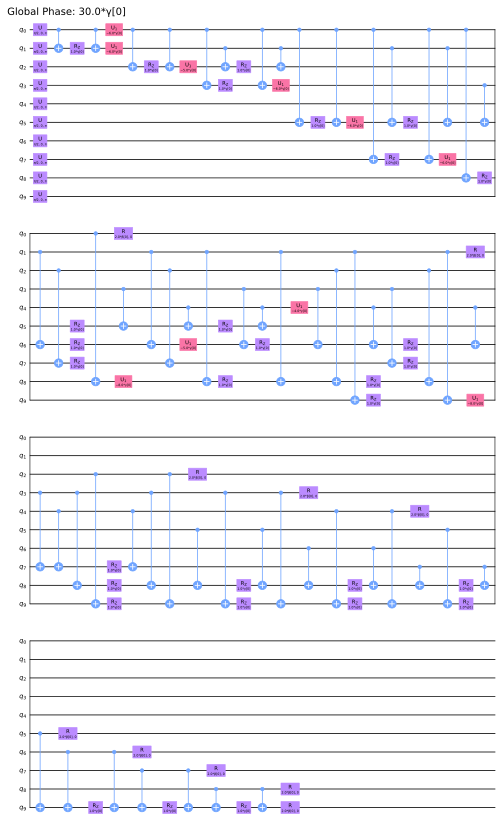

In [23]:
#https://github.com/Qiskit/qiskit/pull/5578
#qaoa.qasm(formatted=True, filename=qc_file)
                    
from qiskit.qpy import dump, load
import io
'''qpy_file = io.BytesIO()
dump(qaoa,qpy_file)
qpy_file.seek(0)
new_circ = load(qpy_file)[0]
display(new_circ.draw())'''


M,q = generate_er_graph(10,0.6,32)
qp = create_qp_from_qmatrix(M)
qp2qubo = QuadraticProgramToQubo()
qubo = qp2qubo.convert(qp)
qubitOp, offset = qubo.to_ising()

## Generate and save QAOA ansatz for QUBO
# Timing for QAOA
start_time = time.time()
qaoa = QAOAAnsatz(cost_operator=qubitOp, reps=1)
qaoa_time = time.time() - start_time
qa = qaoa.decompose().decompose().decompose().decompose()
qa.draw(scale=0.4)


In [24]:
qc_file = f'test_qaoa.qpy'
with open(file=qc_file, mode='wb') as qcfile:
    qpy.dump(qaoa, qcfile)

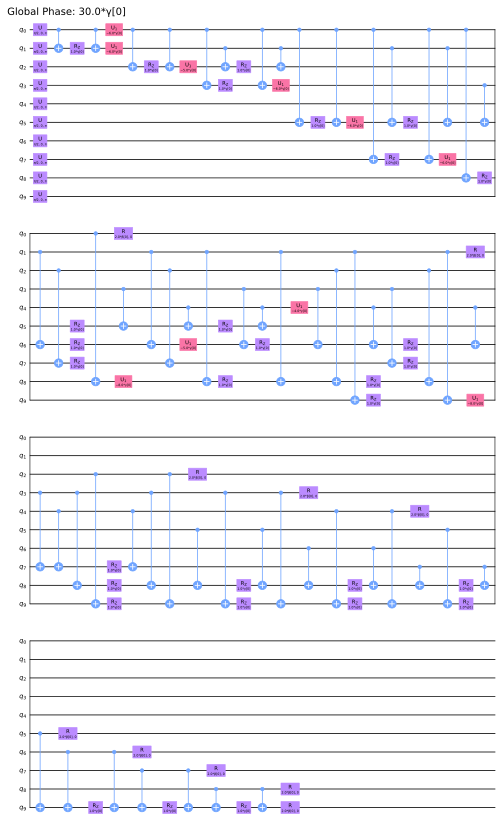

In [25]:
with open(qc_file, mode='rb') as qc:
    reloaded_qaoa_ansatz = qpy.load(qc)[0]
#qaoa_decomposed = reloaded_qaoa_ansatz.decompose().decompose().decompose().decompose()
qaoa_decomposed = reloaded_qaoa_ansatz.decompose().decompose().decompose().decompose()
qaoa_decomposed.draw(scale=0.4)         

In [ ]:

#qc_file = f'{n}_{p}_{seed}_qaoa.qasm'
#qaoa.qasm(formatted=True, filename=qc_file)

'''#https://github.com/Qiskit/qiskit/pull/5578
from qiskit.qpy import dump, load
import io
#qpy_file = io.BytesIO()
dump(qaoa,qpy_file)
with open(file='qpy_file', mode='wb') as qcfile:
    dump(qaoa, qcfile)

#load
qpy_file.seek(0)
new_circ = load(qpy_file)[0]
#new_circ.draw()'''


In [ ]:
def ckt_cut_qaoa1(exp_data_file, max_qubit_counts, partition_methods):
    cols = ['n', 'p', 'seed','Max Qubit Count',
           'Partition Method', 'Partition Runtime', 'CKT Runtime'] #'qaoa Ansatz File'

    df = pd.DataFrame(columns=cols)
    #'n', 'p', 'seed','Graph File','qaoa Ansatz File', 
    #        'Ising Hamiltonian Runtime', 'Ansatz Building Runtime','qubitOp'
    
    #print(input_df.dtypes)
    i = 0
    for max_qubit_cnt in max_qubit_counts:
        #multi-processor code here
        for file in exp_data_file:
            input_df = pd.read_csv(file)
        
            for i, row in enumerate(input_df.itertuples(index=False), 1):
                n = row[0]
                p = row[1]
                seed = row[2]
                if i==1:
                    seed1 = seed 
                #seedn = seed if i==input_df.shape[0]
                graph_filename = row[3]

                #import ast
                #qsubgraph_prop = eval(qsub_prop)

                # load graph object from file
                q = pickle.load(open(graph_filename, 'rb'))
                qnum_sub_graphs, largest_subgraph_size, qsubgraph_prop, max_subgraph_nodes = get_subgraph_properties1(q)

                qc_file = row[4]
                qubitOp = row[7]
                #read the file with qaoa ansatz object
                st = time.time()
                with open(qc_file, mode='rb') as qc:
                    reloaded_qaoa_ansatz = qpy.load(qc)[0]
                #qaoa_decomposed = reloaded_qaoa_ansatz.decompose().decompose().decompose().decompose()
                qaoa_decomposed = reloaded_qaoa_ansatz.decompose().decompose().decompose().decompose()
                #display(qaoa_decomposed.draw(scale=0.4))
                reload_time = time.time() - st
                print(f'qaoa ansatz reload time: {reload_time}')
                qaoa_observable_pat = '[A-Z]+'
                observables = PauliList(re.findall(qaoa_observable_pat, str(qubitOp)))
                #print(qubitOp)
                try:
                    print(f'\n\nCKT Cutting for size {n}, n*p {p}, seed {seed}')
                    #Get subgraphs' properties
                    for pm_ in partition_methods:
                        try:
                            print(pm_)
                            i += 1
                            pm_part_lbl, partitioning_runtime = partitioning(max_qubit_cnt, 
                                                               qsubgraph_prop, 
                                                               pm_)
                            print(pm_part_lbl)

                            sc_partlabel,sampling_overhead,ckt_runtime = ckt(qaoa_decomposed, 
                                                                              pm_part_lbl, 
                                                                              observables)
                            df.loc[i,'n'] = n
                            df.loc[i,'p'] = p
                            df.loc[i,'seed'] = seed
                            df.loc[i,'Max Qubit Count'] = max_qubit_cnt
                            df.loc[i,'Partition Method'] = pm_
                            df.loc[i,'Partition Runtime'] = partitioning_runtime
                            df.loc[i,'CKT Runtime'] = ckt_runtime
                            df.loc[i,'Sampling Overhead'] = sampling_overhead
                        except Exception as e:
                            print(e)
                            continue

                except Exception as e:
                        print(e)
                        continue
                current_time = datetime.datetime.now().strftime("%Y%m%d_%H%M")
                filename = f'exp_' + str(n) + '_' + str(p) + '_' + str(seed1) + str(seed) +'_cktCut_' +current_time+'.csv'
                df.to_csv(os.path.join(ckt_output,filename), index=False)

                    


In [318]:
def ckt_cut_qaoa_th(n,p, max_qubit_counts, partition_methods, start_seed=None, end_seed=None,exp_data_file=None):
    
    
    if start_seed is None:
        start_seed = 0
        exp_data_file = 'qaoa_output/exp_' + str(n) + '_' + str(p) +  '*.csv'
    else:
        exp_data_file = 'qaoa_output/exp_' + str(n) + '_' + str(p) + '_' + str(start_seed)[:1] + '*.csv'
    
    
    if end_seed is None:
        end_seed = 1000000

    cols = ['n', 'p', 'seed','Max Qubit Count',
           'Partition Method', 'Partition Runtime', 'CKT Runtime'] #'qaoa Ansatz File'

    df = pd.DataFrame(columns=cols)
    i = 0
    for max_qubit_cnt in max_qubit_counts:
        #multi-processor code here
        for file in exp_data_file:
            input_df = pd.read_csv(file)
            input_df = input_df[(input_df['seed']>=start_seed)&(input_df['seed']<=end_seed)]
            print(input_df['seed'].values)
        
            for i, row in enumerate(input_df.itertuples(index=False), 1):
                n = row[0]
                p = row[1]
                seed = row[2]
                if i==1:
                    seed1 = seed 
                #seedn = seed if i==input_df.shape[0]
                graph_filename = row[3]

                #import ast
                #qsubgraph_prop = eval(qsub_prop)

                # load graph object from file
                q = pickle.load(open(graph_filename, 'rb'))
                qnum_sub_graphs, largest_subgraph_size, qsubgraph_prop, max_subgraph_nodes = get_subgraph_properties1(q)

                qc_file = row[4]
                qubitOp = row[7]
                #read the file with qaoa ansatz object
                st = time.time()
                with open(qc_file, mode='rb') as qc:
                    reloaded_qaoa_ansatz = qpy.load(qc)[0]
                #qaoa_decomposed = reloaded_qaoa_ansatz.decompose().decompose().decompose().decompose()
                qaoa_decomposed = reloaded_qaoa_ansatz.decompose().decompose().decompose().decompose()
                #display(qaoa_decomposed.draw(scale=0.4))
                reload_time = time.time() - st
                print(f'qaoa ansatz reload time: {reload_time}')
                qaoa_observable_pat = '[A-Z]+'
                observables = PauliList(re.findall(qaoa_observable_pat, str(qubitOp)))
                #print(qubitOp)
                try:
                    print(f'\n\nCKT Cutting for size {n}, n*p {p}, seed {seed}')
                    #Get subgraphs' properties
                    for pm_ in partition_methods:
                        try:
                            print(pm_)
                            i += 1
                            pm_part_lbl, partitioning_runtime = partitioning(max_qubit_cnt, 
                                                               qsubgraph_prop, 
                                                               pm_)
                            print(pm_part_lbl)

                            sc_partlabel,sampling_overhead,ckt_runtime = ckt(qaoa_decomposed, 
                                                                              pm_part_lbl, 
                                                                              observables)
                            df.loc[i,'n'] = n
                            df.loc[i,'p'] = p
                            df.loc[i,'seed'] = seed
                            df.loc[i,'Max Qubit Count'] = max_qubit_cnt
                            df.loc[i,'Partition Method'] = pm_
                            df.loc[i,'Partition Runtime'] = partitioning_runtime
                            df.loc[i,'CKT Runtime'] = ckt_runtime
                            df.loc[i,'Sampling Overhead'] = sampling_overhead
                        except Exception as e:
                            print(e)
                            continue

                except Exception as e:
                        print(e)
                        continue
                current_time = datetime.datetime.now().strftime("%Y%m%d_%H%M")
                filename = f'exp_' + str(n) + '_' + str(p) + '_' + str(seed1) + str(seed) +'_cktCut_' +current_time+'.csv'
                df.to_csv(os.path.join(ckt_output,filename), index=False)

       

In [ ]:
#Threading?

n = 10
p = 0.2
seed1 = 2200 
seed2 = 9000
seed_range = range(seed1,seed2)
files = 'qaoa_output/exp_' + str(n) + '_' + str(p) + '*.csv'
qaoa_files = glob.glob(files)


rs = [qaoa_files[x:x+1] for x in range(0, len(qaoa_files),1)]
print(rs)


st = time.time()

with concurrent.futures.ThreadPoolExecutor() as executor:
    
    futures = [executor.submit(ckt_cut_qaoa, file, [3], ['spectral-clustering']) for file in rs]
    return_value = future.result()
    print(return_value)
print(time.time()-st)

In [319]:
#Threading?

n = 10
p = 0.2
thread_seeds = [2000, 9000]
seed1 = 2200 
seed2 = 9000
seed_range = range(seed1,seed2)
files = 'qaoa_output/exp_' + str(n) + '_' + str(p) + '*.csv'
qaoa_files = glob.glob(files)


rs = [thread_seeds[x:x+1] for x in range(0, len(thread_seeds),1)]
print(rs)


st = time.time()

with concurrent.futures.ThreadPoolExecutor() as executor:
    
    futures = [executor.submit(ckt_cut_qaoa_th, n,p, [3], ['spectral-clustering'],seed) for seed in rs]
    return_value = future.result()
    print(return_value)
print(time.time()-st)


[[2000], [9000]]
    n    p  seed                                   Graph Prop  \
1  10  0.6  7214  qaoa_graph_objects/10_0.6_7214_graph.pickle   
2  10  0.6  4909  qaoa_graph_objects/10_0.6_4909_graph.pickle   

                          qaoa Ansatz File  \
1  qaoa_graph_objects/10_0.6_7214_qaoa.qpy   
2  qaoa_graph_objects/10_0.6_4909_qaoa.qpy   

                                    qaoa observables  \
1  0.5 * IIIIIIIIZZ\n- 3.0 * IIIIIIIIIZ\n- 3.5 * ...   
2  0.5 * IIIIIIIZZI\n- 2.0 * IIIIIIIIZI\n- 2.5 * ...   

  Ising Hamiltonian Runtime Ansatz Building Runtime  
1                  0.037591                0.001806  
2                  0.024684                0.001259  
0.006179094314575195
